# **Closely-related Languages** 

![](https://i.imgur.com/PjrJo4X.png)

**There are 2 implementations in this file**


*   From Scratch
*   Anything Goes




# **Anything Goes**

In [ ]:
##Importing basic libraries for scratch implementation

import sys
import os
import codecs
import math
from IPython.display import HTML, display


In [ ]:
'''
Loading file
'''

def load_data(file):
    sentence = ''
    references = []
    data = open(file, 'r')
    for line in data:
        token = line.rstrip("\n")
        if token == '<s>':
          sentence = ''
        elif token == '</s>':
          references.append(sentence)
        else:
          sentence += token + ' '
    return references
    

In [ ]:
'''
BP is an exponential decay
Brevity Penalty(BP) will be 1.0 when the candidate translation length
is the same as any reference translation length
'''

def brevity_penalty(candidate, reference):
    if candidate > reference:
        return 1
    else:
        tmp = 1-float(reference)/float(candidate)
        return math.pow(math.e, tmp)

In [ ]:
"""
Sum of the clipped n-gram counts for all the candidate sentences
in the corpus divide by the number of candidate n-grams

return: precision value
"""
def modified_precision(clipped_count, candidate_length):
    precision = float(clipped_count)/float(candidate_length)
    return math.log(precision)

In [ ]:
def get_clipped_dic(candidate_dic, reference_dic):
    clipped_dic = {}
    for key, value in candidate_dic.items():
        if key in reference_dic:
            ref_v = reference_dic[key]
            clipped_dic[key] = min(value, ref_v)
    return clipped_dic

def get_clipped_dic_count(clipped_dic):
    count = 0
    for key, value in clipped_dic.items():
        count += value
    return count

In [ ]:

"""
    Generate Ngram for each line.
    @line: a line of words
    @n: ngram
    return: a dictionary of words and its counts
"""

def generate_n_gram(candidate, reference, n):
    can_dic = {}
    ref_dic = {}
    can_list = candidate.split(" ")
    ref_list = reference.split(" ")
    can_len = 0

    for i in range(0, len(can_list)-n+1):
        key = ""
        for j in range(0, n):
            key += can_list[i+j]
            key += "/"
        can_len += 1
        if key in can_dic:
            can_dic[key] += 1
        else:
            can_dic[key] = 1

    for i in range(0, len(ref_list)-n+1):
        key = ""
        for j in range(0,  n):
            key += ref_list[i+j]
            key += "/"

        if key in ref_dic:
            ref_dic[key] += 1
        else:
            ref_dic[key] = 1
    return can_dic, ref_dic, can_len

In [ ]:
"""
    Generating n-gram for the calculation of BLEU score.
"""

def get_count(candidate, reference, n):
    can_dic, ref_dic, can_len = generate_n_gram(candidate, reference, n)
    can_clipped_dic = get_clipped_dic(can_dic, ref_dic)
    can_clipped_count = get_clipped_dic_count(can_clipped_dic)
    return can_clipped_count, can_len


In [ ]:
"""
    Individually calculating scores for all 4 grams
"""



def main(source, target):
    can_len, ref_len = 0, 0

    #Unigram model
    uni_c, uni_t = 0, 0

    #Bi gram model
    bi_c, bi_t = 0, 0

    #Tri gram model
    tri_c, tri_t = 0, 0

    #4 gram model
    four_c, four_t = 0, 0
    
    source_data = load_data(source)
    target_data = load_data(target)

    for c_line, r_line in zip(source_data, target_data):
        c_line = c_line.strip()
        r_line = r_line.strip()
        can_len += len(c_line.split(" "))
        ref_len += len(r_line.split(" "))
        
        #Unigram model
        c_c, t_c = get_count(c_line, r_line, 1)
        uni_c += c_c
        uni_t += t_c
        
        #Bi gram model
        c_c, t_c = get_count(c_line, r_line, 2)
        bi_c += c_c
        bi_t += t_c
        
        #Tri gram model
        c_c, t_c = get_count(c_line, r_line, 3)
        tri_c += c_c
        tri_t += t_c

        #4 gram model
        c_c, t_c = get_count(c_line, r_line, 4)
        four_c += c_c
        four_t += t_c
        
        
#     Calculating precision for all 4 grams.
#     Calculating Brevity Penalty.

    uni_p = modified_precision(uni_c, uni_t)
    bi_p = modified_precision(bi_c, bi_t)
    tri_p = modified_precision(tri_c, tri_t)
    four_p = modified_precision(four_c, four_t)
    bp = brevity_penalty(can_len, ref_len)

    score_uni = bp*math.exp(uni_p)
    score_bi = bp*math.exp(bi_p)
    score_tri = bp*math.exp(tri_p)
    score_4 = bp*math.exp(four_p)
    
    return score_uni, score_bi, score_tri, score_4


In [ ]:
def evaluate():
    source = 'train-source.txt'
    target = 'train-target.txt'
    
    
    source_test = 'test-source.txt'
    target_test = 'test-target.txt' 
    
    uni, bi, tri, four = main(source,target)
    uni_t, bi_t, tri_t, four_t = main(source_test,target_test)
    
    print('----------------------BLEU Score Train------------------------')
    data = [['Unigram :',uni],['Bigram : ',bi],['Trigram :',tri],['4gram :',four]]
    display_table(data)
    
    print('----------------------BLEU Score Test------------------------')
    data_t = [['Unigram :',uni_t],['Bigram : ',bi_t],['Trigram :',tri_t],['4gram :',four_t]]
    display_table(data_t)
    



In [ ]:
#Printing everything
def display_table(data):
    html = "<table>"
    for row in data:
        html += "<tr>"
        for field in row:
            html += "<td><h4>%s</h4><td>"%(field)
        html += "</tr>"
    html += "</table>"
    display(HTML(html))

In [ ]:
evaluate()

----------------------BLEU Score Train------------------------


----------------------BLEU Score Test------------------------


# **Anything Goes**

In [ ]:
## Import the Required Libraries

import string
import re
from numpy import array, argmax, random, take
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, RepeatVector
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 200)

In [ ]:
## Function to load target and source files

def load_data(file):
    sentence = ''
    references = []
    data = open(file, 'r')
    for line in data:
        token = line.rstrip("\n")
        if token == '<s>':
          sentence = ''
        elif token == '</s>':
          references.append(sentence)
        else:
          sentence += token + ' '
    return references


In [ ]:
## Loading files

source = 'train-source.txt'
target = 'train-target.txt'

source_test = 'test-source.txt'
target_test = 'test-target.txt'


x = load_data(source)
y = load_data(target)

x_test = load_data(source_test)
y_test = load_data(source_test)

print(len(x))
print(len(y))

print(len(x_test))
print(len(y_test))

45171
45171
1000
1000


In [ ]:
##Zipping sentences together

sentences = []
for s,t in zip(x, y):
    sentences.append([s,t])
    
sentences_test = []
for s_t,t_t in zip(x_test, y_test):
    sentences_test.append([s_t,t_t])

In [ ]:
sentences = array(sentences)

sentences_test = array(sentences_test)


In [ ]:
## Here we get rid of the punctuation marks.

sentences[:,0] = [s.translate(str.maketrans('', '', string.punctuation)) for s in sentences[:,0]]
sentences[:,1] = [s.translate(str.maketrans('', '', string.punctuation)) for s in sentences[:,1]]

sentences_test[:,0] = [s.translate(str.maketrans('', '', string.punctuation)) for s in sentences_test[:,0]]
sentences_test[:,1] = [s.translate(str.maketrans('', '', string.punctuation)) for s in sentences_test[:,1]]

**Text to Sequence Conversion**

A Seq2Seq model requires that we convert both the input and the output sentences into integer sequences of fixed length.


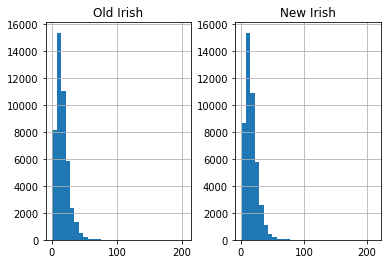

In [ ]:
# empty lists
old_irish = []
new_irish = []

# populate the lists with sentence lengths
for i in sentences[:,0]:
      old_irish.append(len(i.split()))

for i in sentences[:,1]:
      new_irish.append(len(i.split()))

length_df = pd.DataFrame({'Old Irish':old_irish, 'New Irish':new_irish})

length_df.hist(bins = 30)
plt.show()

Here we vectorize our text data by using Keras’s Tokenizer() class. It will turn our sentences into sequences of integers. We can then pad those sequences with zeros to make all the sequences of the same length.

In [ ]:
# function to build a tokenizer
def tokenization(lines):
      tokenizer = Tokenizer()
      tokenizer.fit_on_texts(lines)
      return tokenizer

In [ ]:
# prepare old irish tokenizer
old_tokenizer = tokenization(sentences[:, 0])
old_vocab_size = len(old_tokenizer.word_index) + 1

old_length = 8
print('Old Irish Vocabulary Size: %d' % old_vocab_size)

# prepare old irish tokenizer
old_tokenizer_test = tokenization(sentences_test[:, 0])
old_vocab_size_test = len(old_tokenizer_test.word_index) + 1

old_length = 8
print('Old Irish Vocabulary Size(Test): %d' % old_vocab_size_test)

Old Irish Vocabulary Size: 29468
Old Irish Vocabulary Size(Test): 3188


In [ ]:
# prepare new irish tokenizer
new_tokenizer = tokenization(sentences[:, 1])
new_vocab_size = len(new_tokenizer.word_index) + 1

new_length = 8
print('New Irish Vocabulary Size: %d' % new_vocab_size)

# prepare new irish tokenizer
new_tokenizer_test = tokenization(sentences_test[:, 1])
new_vocab_size_test = len(new_tokenizer_test.word_index) + 1

new_length = 8
print('New Irish Vocabulary Size(Test): %d' % new_vocab_size_test)

New Irish Vocabulary Size: 25072
New Irish Vocabulary Size(Test): 3188


The below code block contains a function to prepare the sequences. It will also perform sequence padding to a maximum sentence length.

In [ ]:
# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
         # integer encode sequences
         seq = tokenizer.texts_to_sequences(lines)
         # pad sequences with 0 values
         seq = pad_sequences(seq, maxlen=length, padding='post')
         return seq

In [ ]:

train = sentences
test = sentences_test

In [ ]:
# prepare training data
trainX = encode_sequences(old_tokenizer, old_length, train[:, 0])
trainY = encode_sequences(new_tokenizer, new_length, train[:, 1])

# prepare validation data
testX = encode_sequences(old_tokenizer_test, old_length, test[:, 0])
testY = encode_sequences(new_tokenizer_test, new_length, test[:, 1])

We’ll start off by defining our Seq2Seq model architecture:

* For the encoder, we will use an embedding layer and an LSTM layer
* For the decoder, we will use another LSTM layer followed by a dense layer

In [ ]:
# build NMT model
def define_model(in_vocab,out_vocab, in_timesteps,out_timesteps,units):
      model = Sequential()
      model.add(Embedding(in_vocab, units, input_length=in_timesteps, mask_zero=True))
      model.add(LSTM(units))
      model.add(RepeatVector(out_timesteps))
      model.add(LSTM(units, return_sequences=True))
      model.add(Dense(out_vocab, activation='softmax'))
      return model

We will train it for 30 epochs and with a batch size of 512




In [ ]:
# model compilation
model = define_model(old_vocab_size, new_vocab_size, old_length, new_length, 512)

In [ ]:
rms = optimizers.RMSprop(lr=0.001)
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')

Here we are using the ModelCheckpoint() function to save the model with the lowest validation loss

In [ ]:
filename = 'model.h1.rkc_nlp_mt'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# train model
history = model.fit(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1),
                    epochs=30, batch_size=512, validation_split = 0.2,callbacks=[checkpoint], 
                    verbose=1)

Epoch 1/30
71/71 [==============================] - ETA: 0s - loss: 6.8201
Epoch 00001: val_loss improved from inf to 6.40146, saving model to model.h1.rkc_nlp_mt
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model.h1.rkc_nlp_mt/assets
71/71 [==============================] - 132s 2s/step - loss: 6.8201 - val_loss: 6.4015
Epoch 2/30
71/71 [==============================] - ETA: 0s - loss: 6.4118
Epoch 00002: val_loss improved from 6.40146 to 6.39783, saving model to model.h1.rkc_nlp_mt
INFO:tensorflow:Assets written to: model.h1.rkc_nlp_mt/assets
71/71 [==============================] - 136s 2s/step - loss: 6.4118 - val_loss: 6.3978
Epoch 3/30
71/71 [==============================] - ETA: 0s - loss: 6.2888
Epoch 00003: val_loss improved from 6.39783 to 6.17902, saving model to model.h1.rkc_nlp_mt
INFO:tensorflow:Assets written to: model.h1.rkc_nlp_mt/assets
71/71 [==============================] - 98s 1s/step - loss:

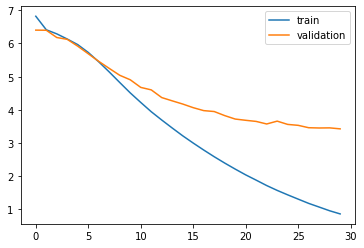

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [ ]:
model = load_model('model.h1.rkc_nlp_mt')
preds = model.predict_classes(testX.reshape((testX.shape[0],testX.shape[1])))

In [ ]:
def get_word(n, tokenizer):
      for word, index in tokenizer.word_index.items():
          if index == n:
              return word
      return None

Converting predictions into text

In [ ]:
preds_text = []
for i in preds:
       temp = []
       for j in range(len(i)):
            t = get_word(i[j], new_tokenizer)
            if j > 0:
                if (t == get_word(i[j-1], new_tokenizer)) or (t == None):
                     temp.append('')
                else:
                     temp.append(t)
            else:
                   if(t == None):
                          temp.append('')
                   else:
                          temp.append(t) 

       preds_text.append(' '.join(temp))

**Calculating BLEU score**

In [ ]:
import  nltk.translate.bleu_score as bleu

In [ ]:
import numpy as np
arr = np.array(test[:,0]).tolist()

In [ ]:

hypothesis_tokens = [line.split(' ') for line in preds_text]
references_tokens = [[line.split(' ')] for line in arr]


In [ ]:
print("BLEU Score: ",bleu.corpus_bleu(references_tokens, hypothesis_tokens))


BLEU Score: 0.50195087822108594


# Aknowledgements

* [Tips on Building NMT](https://github.com/neubig/nmt-tips)
* [BLEU Score in Detail](https://towardsdatascience.com/bleu-bilingual-evaluation-understudy-2b4eab9bcfd1)
* [StackShare](https://stackabuse.com/the-naive-bayes-algorithm-in-python-with-scikit-learn/)